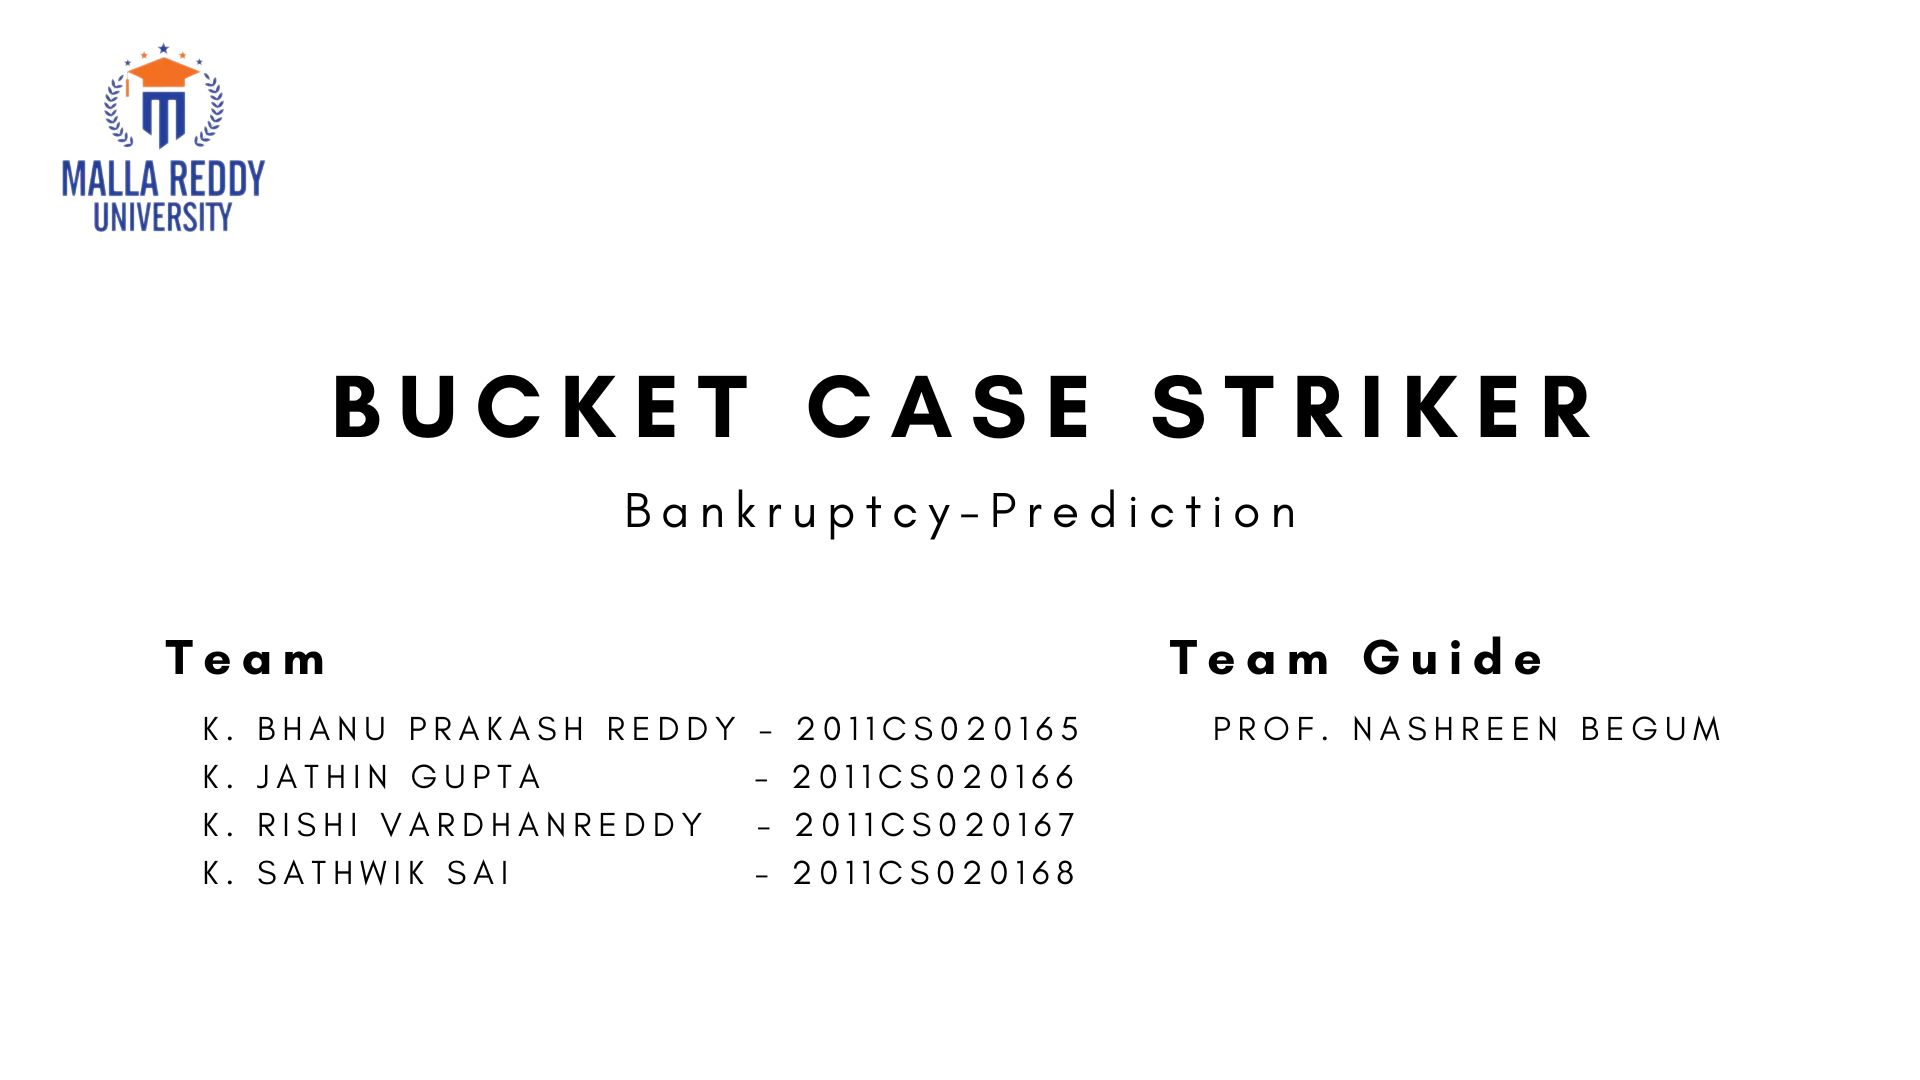

## Import the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

## Load the dataset

In [5]:
data = pd.read_csv("data.csv")

## Data Info

In [6]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
data.shape

(6819, 96)

## Data Preprocessing 

In [9]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

### Mean Imputation

In [10]:

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(data)

imputed_data = imputer.transform(data.values)

print(imputed_data)

[[1.         0.37059426 0.42438945 ... 0.56405011 1.         0.01646874]
 [1.         0.46429094 0.53821413 ... 0.57017495 1.         0.02079431]
 [1.         0.42607127 0.49901875 ... 0.56370608 1.         0.01647411]
 ...
 [0.         0.47272461 0.533744   ... 0.5651584  1.         0.09764874]
 [0.         0.50626432 0.5599106  ... 0.56530151 1.         0.04400945]
 [0.         0.49305319 0.57010467 ... 0.56516694 1.         0.23390224]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### KNN imputation


In [11]:
knn = KNNImputer(n_neighbors=2, add_indicator=True)
knn.fit(data)
knn.transform(data)

array([[1.        , 0.37059426, 0.42438945, ..., 0.56405011, 1.        ,
        0.01646874],
       [1.        , 0.46429094, 0.53821413, ..., 0.57017495, 1.        ,
        0.02079431],
       [1.        , 0.42607127, 0.49901875, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.        , 0.47272461, 0.533744  , ..., 0.5651584 , 1.        ,
        0.09764874],
       [0.        , 0.50626432, 0.5599106 , ..., 0.56530151, 1.        ,
        0.04400945],
       [0.        , 0.49305319, 0.57010467, ..., 0.56516694, 1.        ,
        0.23390224]])

### MICE Imputation

In [12]:
print(data)
mice_imputer = IterativeImputer()
data = mice_imputer.fit_transform(data)
print(data)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                         

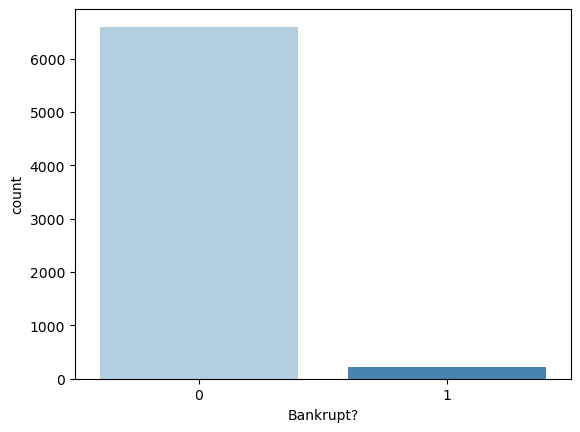

In [13]:
data = pd.read_csv("data.csv")
df = pandas.DataFrame(data=data, columns=["variable"])
ax = sns.countplot(x = 'Bankrupt?',data = data,palette ='Blues')

C:\Users\Jathin\AppData\Local\Temp\ipykernel_2244\1263052128.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lt_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


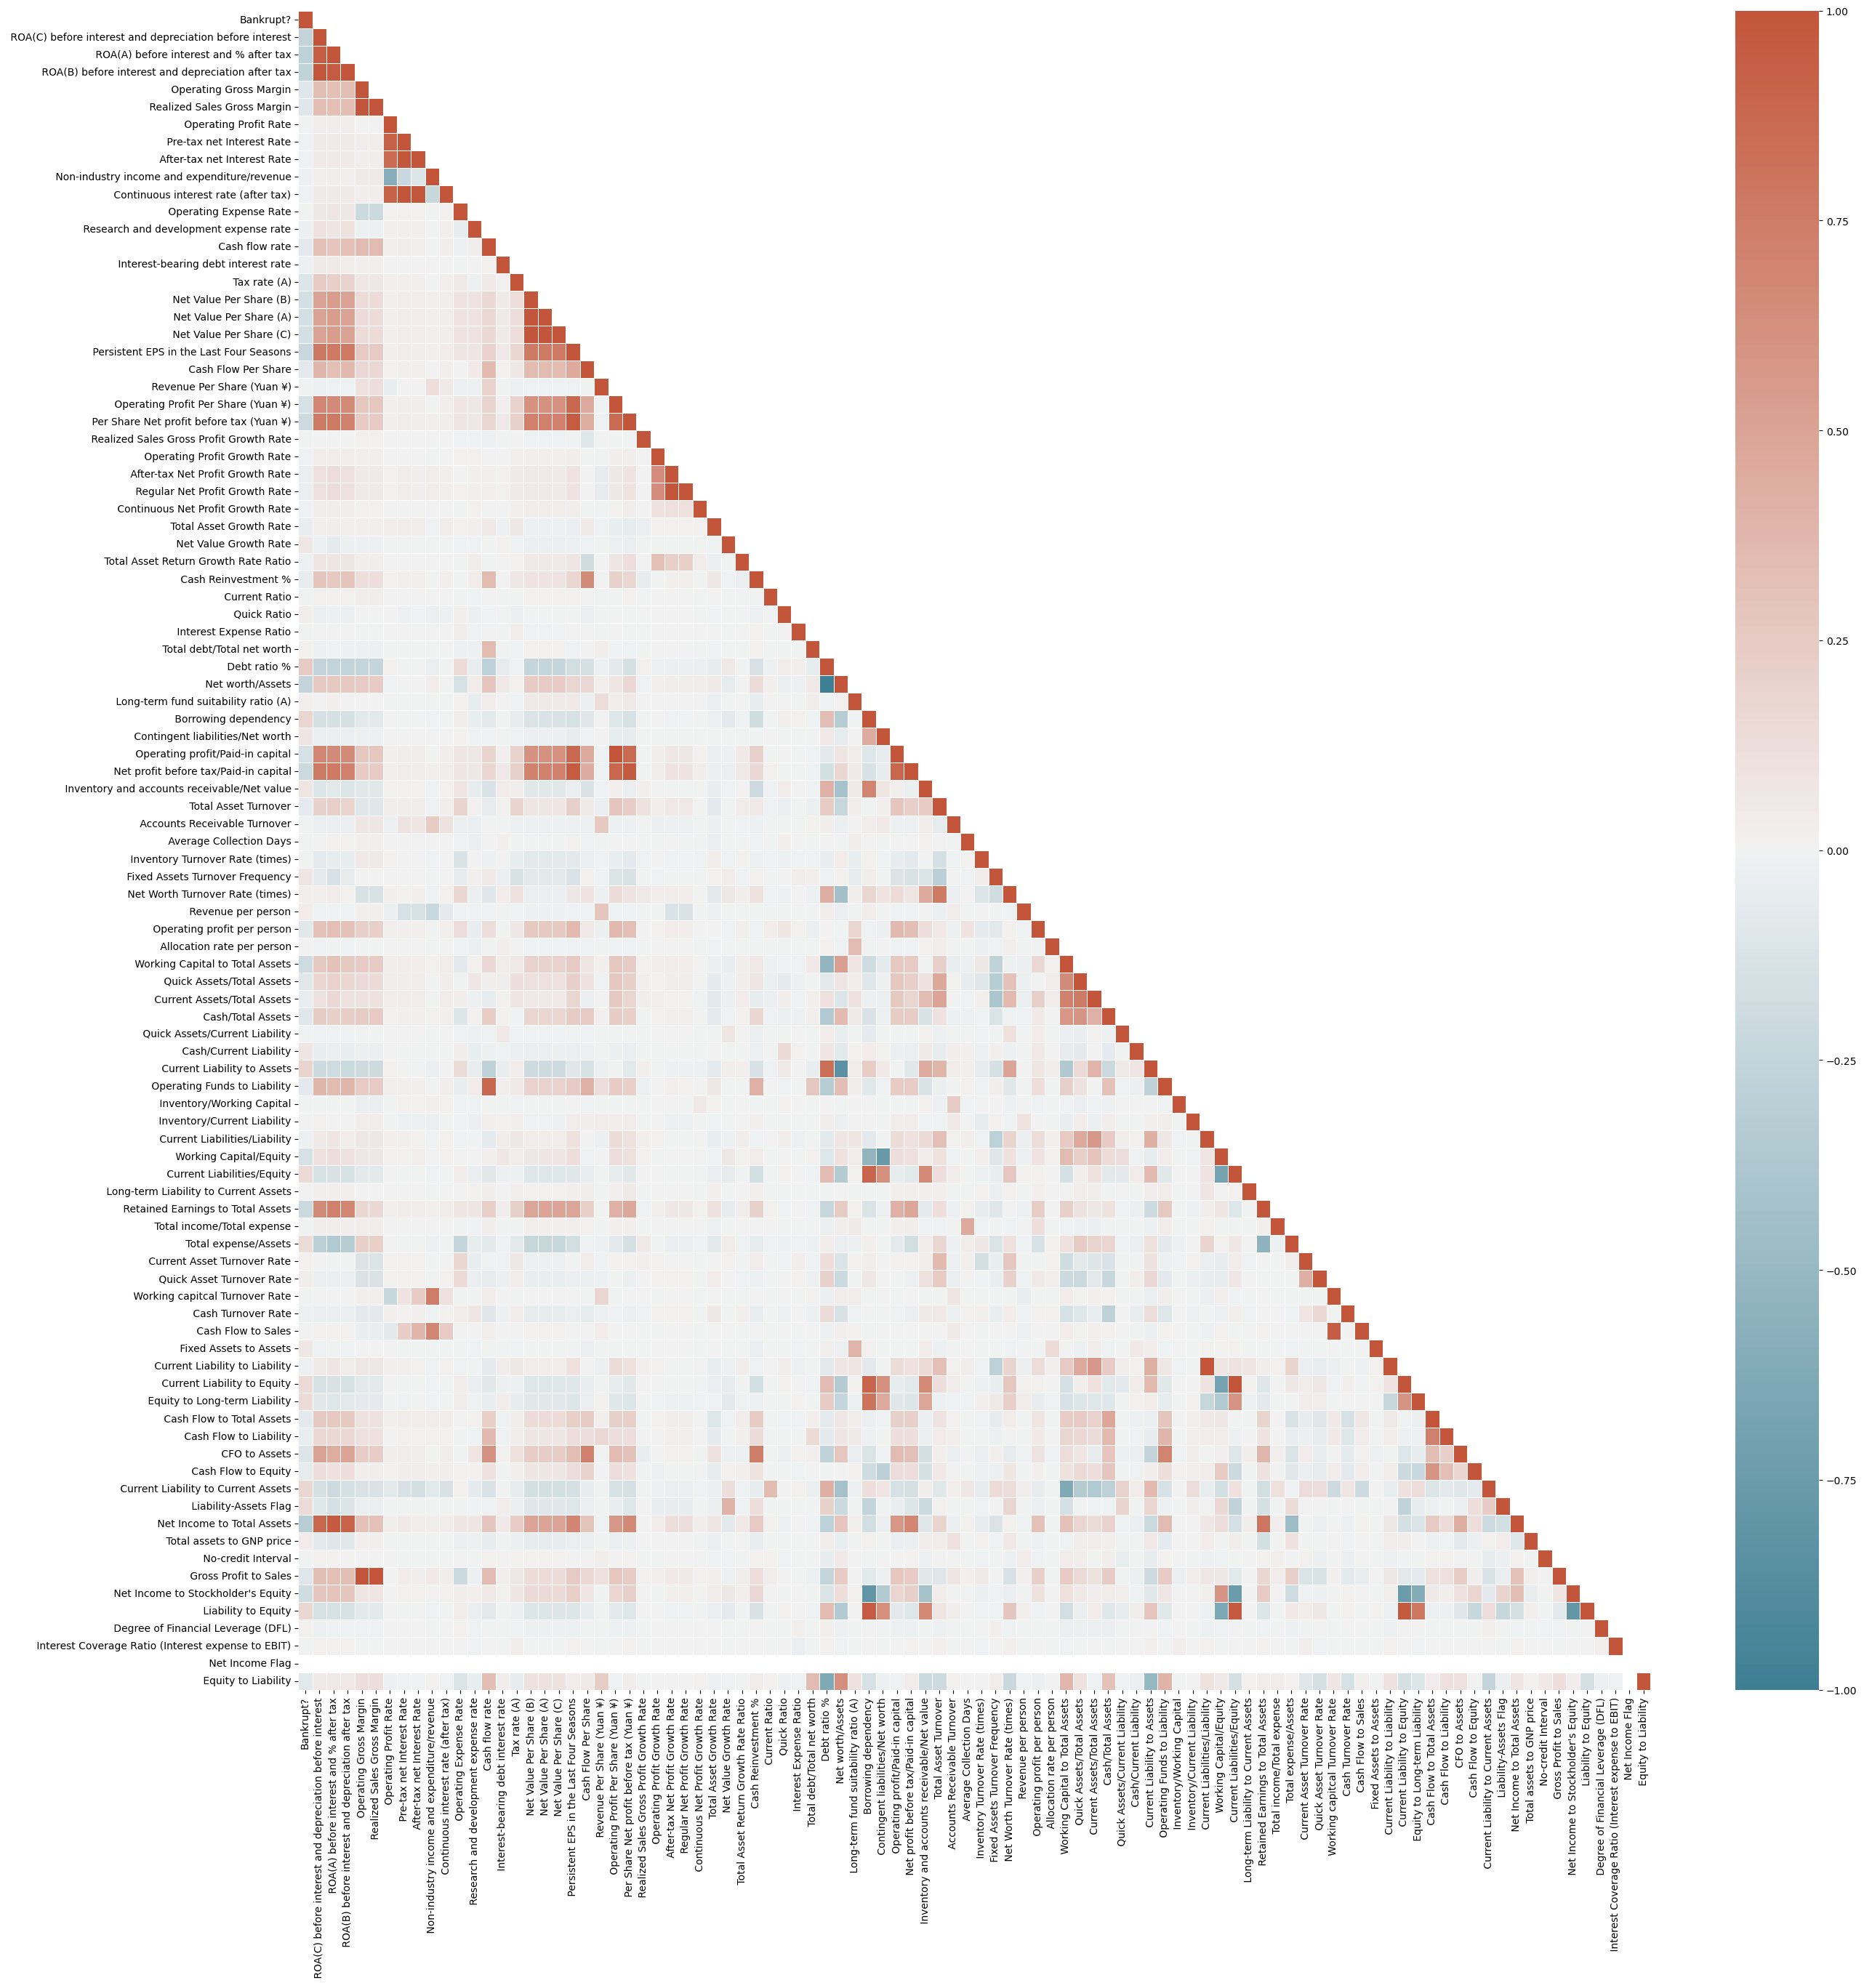

In [14]:
corr_mat = data.corr()
lt_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize=(30,30))   
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(lt_mat, linewidths=0.5,cmap=cmap, ax=ax)
plt.show()

In [15]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Feature Selection

### separate train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Determine Mutual Information

In [17]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.02970272, 0.03353648, 0.03080696, 0.01689145, 0.01677635,
       0.01984383, 0.03036128, 0.02840018, 0.03076818, 0.03647311,
       0.00200223, 0.00291885, 0.01329294, 0.        , 0.01830898,
       0.03132705, 0.03048014, 0.02747299, 0.04452671, 0.00848339,
       0.00279493, 0.02107278, 0.04043372, 0.00896993, 0.00663787,
       0.01207798, 0.00969784, 0.0108299 , 0.01276507, 0.00115735,
       0.01188398, 0.00120054, 0.01986743, 0.02290014, 0.03405691,
       0.02941479, 0.03431896, 0.03484808, 0.0104724 , 0.03933128,
       0.0021389 , 0.024647  , 0.04326852, 0.0048273 , 0.01134241,
       0.        , 0.00234492, 0.00618383, 0.00478303, 0.        ,
       0.00125221, 0.02448458, 0.00674448, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.02284189, 0.01435268, 0.01610328,
       0.01731491, 0.02286319, 0.00188348, 0.00263964, 0.02232087,
       0.02399633, 0.00493128, 0.03457833, 0.03417276, 0.00907948,
       0.        , 0.00262486, 0.01903018, 0.00409091, 0.00388

Text(0, 0.5, 'Mutual Information')

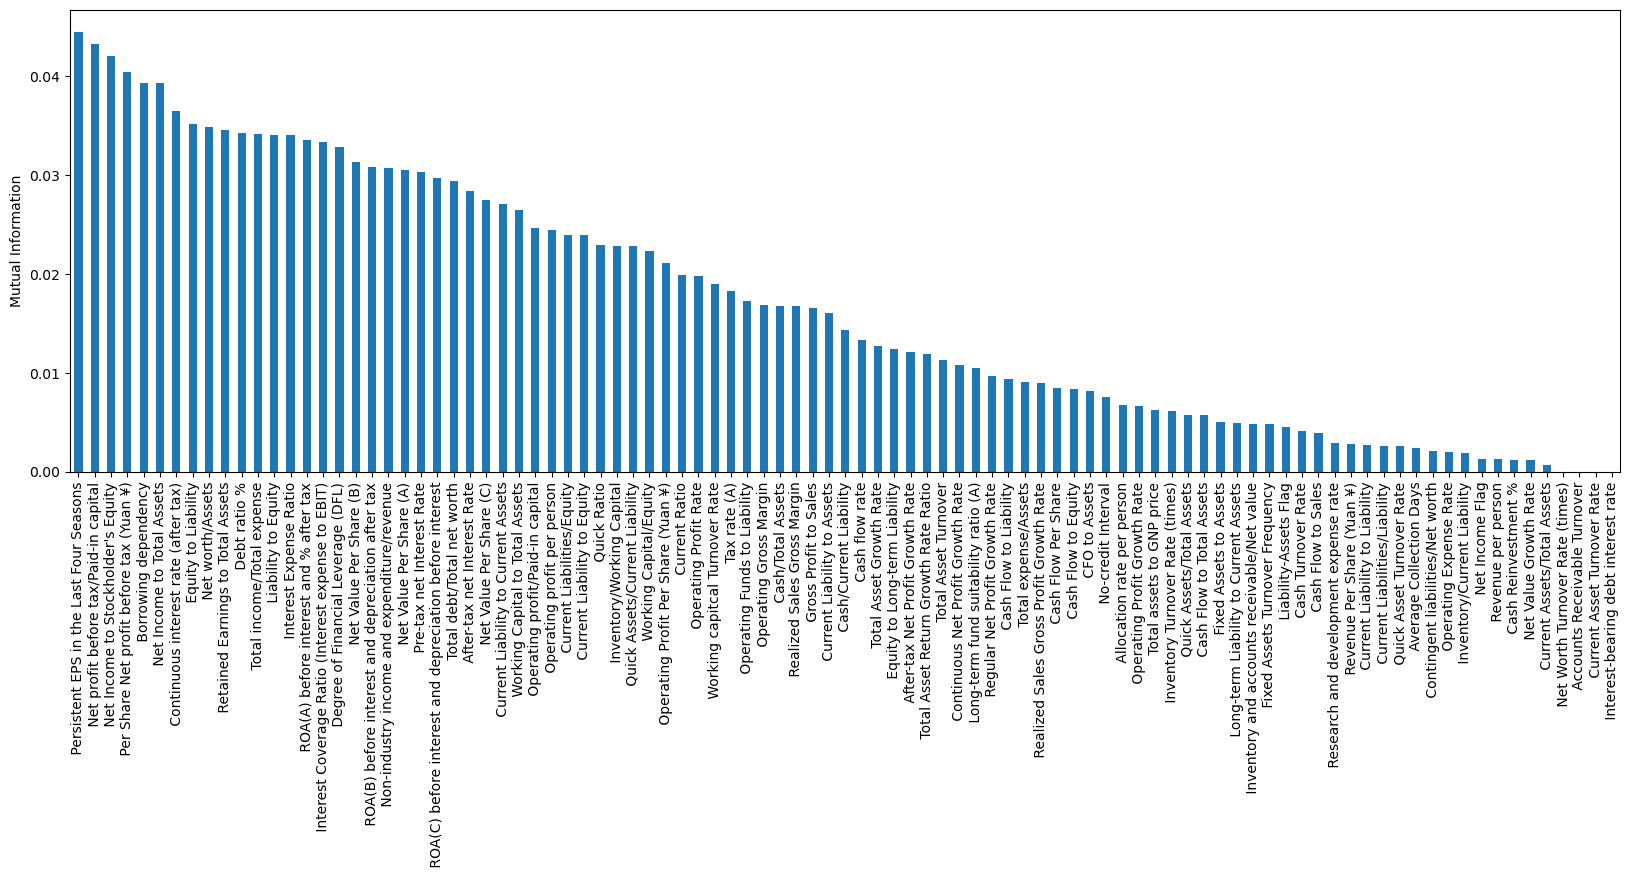

In [18]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

### Select top k features based on MI

In [19]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

# to remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train.shape,X_test.shape

((4773, 10), (2046, 10))

## Feature Scaling

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Smote Technique

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 161
Before OverSampling, counts of label '0': 4612 

After OverSampling, the shape of train_X: (9224, 10)
After OverSampling, the shape of train_y: (9224,) 

After OverSampling, counts of label '1': 4612
After OverSampling, counts of label '0': 4612


## Classifiers 

### Logistic Regression

In [22]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

[0 0 0 ... 0 0 0]
Accuracy score: 0.969208211143695


### SVM

In [23]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### Predict the test set result of SVM

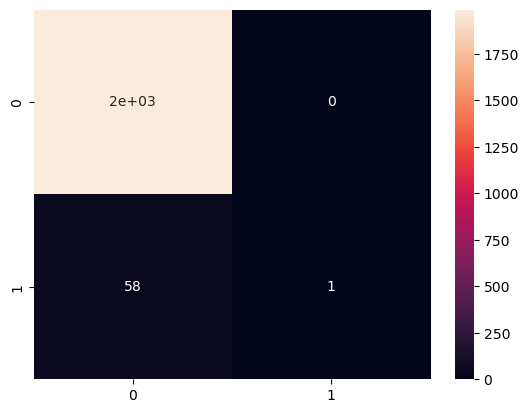

In [24]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [25]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9716520039100685


### Training the Gauss Naive Bayes on the Training set

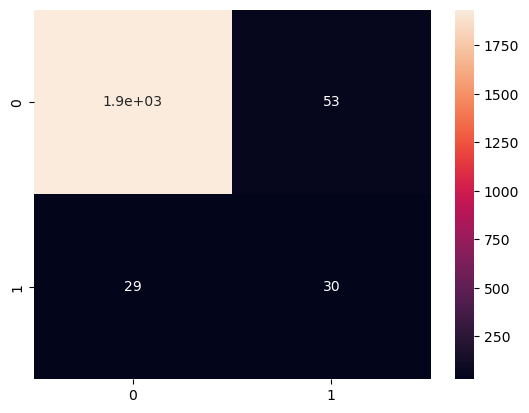

In [26]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [27]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc3}")

Accuracy score : 0.9599217986314761


### Training Decision Tree Classification on Train set

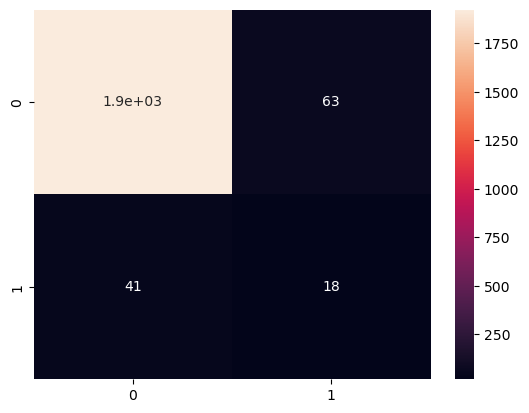

In [28]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [29]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.9491691104594331


### Training the Random Forest Classification model on the Training set

In [30]:

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

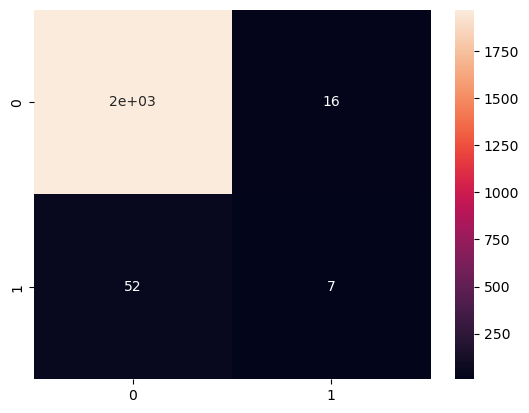

In [31]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()
acc5 = accuracy_score(y_test, y_pred)

In [32]:
print(f"Random Forest Classification accuracy: {acc5}")

Random Forest Classification accuracy: 0.9667644183773216


### XG Boost

In [33]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[20:04:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### XG Boost Classifier confusion matrix

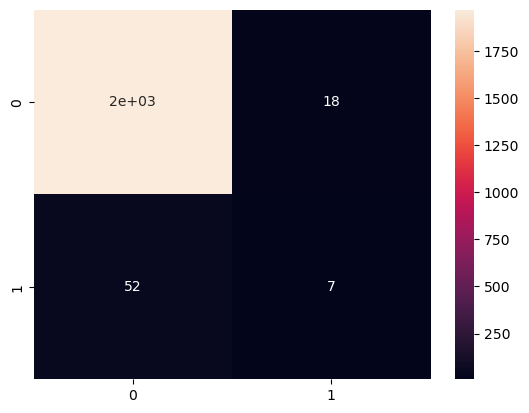

In [34]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()
acc6 = accuracy_score(y_test, y_pred)

In [35]:
print(f"By XG Boost classifier Acc: {acc6}")

By XG Boost classifier Acc: 0.9657869012707723


### Training CatBoost on the Training set

In [36]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

ModuleNotFoundError: No module named 'catboost'

In [ ]:

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()
acc7 = accuracy_score(y_test, y_pred)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(acc7)

# Create visualization of all models.

In [ ]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("Naive Bayes")
mylist.append(acc4)
mylist2.append("DTR")
mylist.append(acc5)
mylist2.append("RFC")
mylist.append(acc6)
mylist2.append("XG Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
df = data.copy()

In [ ]:
df.head()

In [ ]:
X = df.drop(['Bankrupt?'],axis=1).values
y = df['Bankrupt?'].values

# Split the data set (for PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

# Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
pca_acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"PCA Accuracy is: {pca_acc}")

# Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))